## RFM Analysis with Python  

RFM Analysis is a customer segmentation technique. It is used to segment the customers using their buying behaviours.

RFM stands for Recency , Frquency and Monetary Value.

Recency (How recently did the customer make a purchase?), 

Frequency (How often do they purchase),

and Monetary Value (How much do they spend?)

To perform  RFM analysis using Python,  we need a dataset that  includes customer IDs, purchase dates, and transaction amounts. 

With this information, we can calculate RFM values for each customer and analyze their patterns and behaviours.

In [382]:
# Importing neccessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px    # visualization library
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [383]:
# Read the dataset

rfm_data = pd.read_csv('C:/Users/HP/Downloads/rfm_data.csv')

In [384]:
rfm_data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [385]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [386]:
rfm_data.shape


(1000, 6)

Now , we will calculate the Recency , Frequency and MonetarY values as RFM Scores of each customer

For Recency : We will use purchase date ,convert it to data time format and extraxt the number of days. It gives us the number of days since the customer’s last purchase, representing their recency value.

For Frequency : We will calculate the frequency for each customer. We grouped the data by ‘CustomerID’ and counted the number of unique ‘OrderID’ values to determine the number of purchases made by each customer. It gives us the frequency value, representing the total number of purchases made by each customer.

For monetary value " We will group  the data by ‘CustomerID’ and summed the ‘TransactionAmount’ values to calculate the total amount spent by each customer. It gives us the monetary value, representing the total monetary contribution of each customer.

In [387]:
# Recency :
from datetime import datetime

rfm_data['PurchaseDate'] = pd.to_datetime(rfm_data['PurchaseDate'])                # Covert the coloum to date time format

rfm_data['Recency'] = ( datetime.now().date() - rfm_data['PurchaseDate'].dt.date).dt.days       #get current time and subract the purchase date and count days

In [388]:
rfm_data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,83
1,2188,2023-04-11,463.70,Product A,176819,London,83
2,4608,2023-04-11,80.28,Product A,340062,New York,83
3,2559,2023-04-11,221.29,Product A,239145,London,83
4,9482,2023-04-11,739.56,Product A,194545,Paris,83


In [389]:
# Frequency

customer_frequency = rfm_data.groupby("CustomerID")["OrderID"].count().reset_index()
customer_frequency.rename(columns = {"OrderID" :"Frequency"} , inplace = True)

rfm_data = rfm_data.merge(customer_frequency, on = "CustomerID" , how = "left")

In [390]:
rfm_data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,83,1
1,2188,2023-04-11,463.70,Product A,176819,London,83,1
2,4608,2023-04-11,80.28,Product A,340062,New York,83,1
3,2559,2023-04-11,221.29,Product A,239145,London,83,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,83,1


In [391]:
#Monetary Value

amount = rfm_data.groupby("CustomerID")["TransactionAmount"].sum().reset_index()
amount.rename(columns = {"TransactionAmount" : "Monetary_Value"},inplace = True)

rfm_data = rfm_data.merge(amount, on= "CustomerID" , how = "left")

In [392]:
rfm_data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary_Value
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,83,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,83,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,83,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,83,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,83,1,739.56


Now have the necessary RFM values (recency, frequency, monetary value) for each customer.

Lets Calculate RFM Scores 

In [393]:
# Creating score criteria

frequency_scores = [1,2,3,4,5]   # higher the frequncy value -> higher score
monetary_scores = [1,2,3,4,5]    # higher the monetary value -> higher score
recency_scores = [5,4,3,2,1]      #higher the recency value ->lower score (less recent purchases)

#Calculate RSM score for Each Customer

rfm_data["Recency_Score"] = pd.cut(rfm_data["Recency"] ,bins =5 , labels= recency_scores)
rfm_data["Frequency_Score"] = pd.cut(rfm_data["Frequency"] ,bins =5 , labels= frequency_scores)
rfm_data["Monetary_Score"] = pd.cut(rfm_data["Monetary_Value"] ,bins =5 , labels= monetary_scores)

In [394]:
rfm_data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary_Value,Recency_Score,Frequency_Score,Monetary_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,83,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,83,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,83,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,83,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,83,1,739.56,1,1,2


We assigned scores from 5 to 1 to calculate the recency score, where a higher score indicates a more recent purchase. It means that customers who have purchased more recently will receive higher recency scores.

We assigned scores from 1 to 5 to calculate the frequency score, where a higher score indicates a higher purchase frequency. Customers who made more frequent purchases will receive higher frequency scores.

To calculate the monetary score, we assigned scores from 1 to 5, where a higher score indicates a higher amount spent by the customer.

In [395]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   Monetary_Value      1000 non-null   float64       
 9   Recency_Score       1000 non-null   category      
 10  Frequency_Score     1000 non-null   category      
 11  Monetary_Score      1000 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 81.7+ KB


In [396]:
#Changing the category type to int

rfm_data["Recency_Score"] = rfm_data["Recency_Score"].astype(int)
rfm_data["Frequency_Score"] = rfm_data["Frequency_Score"].astype(int)
rfm_data["Monetary_Score"] = rfm_data["Monetary_Score"].astype(int)

In [397]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   Monetary_Value      1000 non-null   float64       
 9   Recency_Score       1000 non-null   int32         
 10  Frequency_Score     1000 non-null   int32         
 11  Monetary_Score      1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(4), object(2)
memory usage: 89.8+ KB


In [398]:
rfm_data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary_Value,Recency_Score,Frequency_Score,Monetary_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,83,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,83,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,83,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,83,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,83,1,739.56,1,1,2


In [399]:
# Creating final RSM SCORE

rfm_data["RFM_Score"] = rfm_data["Recency_Score"]+ rfm_data["Frequency_Score"]+ rfm_data["Monetary_Score"]

In [400]:
rfm_data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary_Value,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,83,1,943.31,1,1,2,4
1,2188,2023-04-11,463.70,Product A,176819,London,83,1,463.70,1,1,1,3
2,4608,2023-04-11,80.28,Product A,340062,New York,83,1,80.28,1,1,1,3
3,2559,2023-04-11,221.29,Product A,239145,London,83,1,221.29,1,1,1,3
4,9482,2023-04-11,739.56,Product A,194545,Paris,83,1,739.56,1,1,2,4


We have the R+F+M Score for Each Customers

In [401]:
rfm_data["RFM_Score"].unique()

array([ 4,  3,  7,  5,  8,  6, 11,  9, 12, 10, 13, 15])

Now we can segment or categorize these scores into High,Low and Medium for easier analysis.

In [402]:
#Segment the RSM score into high ,mid and low

segments = ['Low','Mid','High']

rfm_data["RFM_Segments"] = pd.qcut(rfm_data["RFM_Score"],q=3,labels = segments)

In [403]:
rfm_data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary_Value,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RFM_Segments
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,83,1,943.31,1,1,2,4,Low
1,2188,2023-04-11,463.70,Product A,176819,London,83,1,463.70,1,1,1,3,Low
2,4608,2023-04-11,80.28,Product A,340062,New York,83,1,80.28,1,1,1,3,Low
3,2559,2023-04-11,221.29,Product A,239145,London,83,1,221.29,1,1,1,3,Low
4,9482,2023-04-11,739.56,Product A,194545,Paris,83,1,739.56,1,1,2,4,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,23,1,759.62,5,1,2,8,High
996,6669,2023-06-10,941.50,Product C,987025,New York,23,1,941.50,5,1,2,8,High
997,8836,2023-06-10,545.36,Product C,512842,London,23,1,545.36,5,1,2,8,High
998,1440,2023-06-10,729.94,Product B,559753,Paris,23,1,729.94,5,1,2,8,High


After calculating the RFM scores, we created RFM segments based on the scores.

We divided RFM scores into three segments, namely “Low-Value”, “Mid-Value”, and “High-Value”.

Segmentation is done using the pd.qcut() function, which evenly distributes scores between segments.

In [404]:
#Checking the distribution of RFM Segments

segments_count = rfm_data["RFM_Segments"].value_counts().reset_index()
segments_count.columns = ["RFM_Segments","Count"]

In [405]:
segments_count

,RFM_Segments,Count
0,Low,435
1,Mid,386
2,High,179


In [406]:
# Plot the distribution


pastel_colors = px.colors.qualitative.Pastel   #getting colors for px

fig = px.bar(segments_count, x="RFM_Segments", y="Count", color ="RFM_Segments" , title = "RFM Segments Distribution")
fig.show()

From the above bar chart , we can see that there are :

426 Customers with low-segment that is low RFM Score

373 Customers with Mid-segment that is Mid RFM Score

201 Customers with High-segment that is high RFM Score

RFM Customer Segments :

Lets distribute the customers with high, low and mid  rfm values into categories for more granular analysis of overall customer RFM characteristics. 

The Categories would be :

1) Best Loyal Customers

2) Potential Loyalist

3) At Risk Customers

4) Can't Lose

5) Lost



In [407]:
#Fisrt create a empty column

rfm_data['Customer_Segments'] = ''


rfm_data.loc[rfm_data["RFM_Score"] >= 9 ,"Customer_Segments"]='Best Loyal Customers'
rfm_data.loc[(rfm_data["RFM_Score"] >=6) & (rfm_data["RFM_Score"] <9 ),"Customer_Segments"]='Potential Loyalist'
rfm_data.loc[(rfm_data["RFM_Score"] >=5) & (rfm_data["RFM_Score"] <6),"Customer_Segments"]='At Risk Customers'
rfm_data.loc[(rfm_data["RFM_Score"] >=4) & (rfm_data["RFM_Score"] <5),"Customer_Segments"]='Cant Lose'
rfm_data.loc[(rfm_data["RFM_Score"] >=3) & (rfm_data["RFM_Score"] <4),"Customer_Segments"]='Lost'

In [408]:
rfm_data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary_Value,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RFM_Segments,Customer_Segments
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,83,1,943.31,1,1,2,4,Low,Cant Lose
1,2188,2023-04-11,463.70,Product A,176819,London,83,1,463.70,1,1,1,3,Low,Lost
2,4608,2023-04-11,80.28,Product A,340062,New York,83,1,80.28,1,1,1,3,Low,Lost
3,2559,2023-04-11,221.29,Product A,239145,London,83,1,221.29,1,1,1,3,Low,Lost
4,9482,2023-04-11,739.56,Product A,194545,Paris,83,1,739.56,1,1,2,4,Low,Cant Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,23,1,759.62,5,1,2,8,High,Potential Loyalist
996,6669,2023-06-10,941.50,Product C,987025,New York,23,1,941.50,5,1,2,8,High,Potential Loyalist
997,8836,2023-06-10,545.36,Product C,512842,London,23,1,545.36,5,1,2,8,High,Potential Loyalist
998,1440,2023-06-10,729.94,Product B,559753,Paris,23,1,729.94,5,1,2,8,High,Potential Loyalist


In [409]:
rfm_data['RFM_Score'].unique()

array([ 4,  3,  7,  5,  8,  6, 11,  9, 12, 10, 13, 15])

In [410]:
rfm_data['Customer_Segments'].unique()

array(['Cant Lose', 'Lost', 'Potential Loyalist', 'At Risk Customers',
       'Best Loyal Customers'], dtype=object)

In [411]:
rfm_data[['CustomerID', 'Customer_Segments','RFM_Segments']]

,CustomerID,Customer_Segments,RFM_Segments
0,8814,Cant Lose,Low
1,2188,Lost,Low
2,4608,Lost,Low
3,2559,Lost,Low
4,9482,Cant Lose,Low
...,...,...,...
995,2970,Potential Loyalist,High
996,6669,Potential Loyalist,High
997,8836,Potential Loyalist,High
998,1440,Potential Loyalist,High


RFM Analysis 

We can distribute the categories according to RFM_Score values accordingly and analyze the count of low values in each category, high values in each category and mid values in each category. This will help us to analyze how the values have been distributed in each category and in which category customer belongs.

In [412]:
segment_product_counts = rfm_data.groupby(['RFM_Segments', 'Customer_Segments']).size().reset_index(name = 'count')

segment_product_counts = segment_product_counts.sort_values('count', ascending=False)


In [413]:

segment_product_counts

,RFM_Segments,Customer_Segments,count
9,Mid,Potential Loyalist,386
0,Low,At Risk Customers,180
2,Low,Cant Lose,173
14,High,Potential Loyalist,117
3,Low,Lost,82
11,High,Best Loyal Customers,62
1,Low,Best Loyal Customers,0
4,Low,Potential Loyalist,0
5,Mid,At Risk Customers,0
6,Mid,Best Loyal Customers,0


In [414]:
#Plot a tree-map

fig_treemap = px.treemap(segment_product_counts, path=['RFM_Segments', 'Customer_Segments'], 
                                         values='count',
                                         color='RFM_Segments', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')

fig_treemap.show()

Now lets do some analysis on the best loyal customers and find out their traits :

In [415]:
best_loyal_cust = rfm_data[rfm_data["Customer_Segments"] == 'Best Loyal Customers']

In [416]:
best_loyal_cust['Recency_Score'].unique()

array([1, 2, 3, 4, 5])

In [417]:
best_loyal_cust 

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary_Value,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RFM_Segments,Customer_Segments
63,5557,2023-04-14,511.86,Product D,522866,London,80,3,2379.45,1,5,5,11,High,Best Loyal Customers
180,5557,2023-04-22,996.98,Product D,765620,Tokyo,72,3,2379.45,1,5,5,11,High,Best Loyal Customers
220,3938,2023-04-25,806.29,Product A,520400,New York,69,2,1731.53,2,3,4,9,High,Best Loyal Customers
235,4804,2023-04-25,690.50,Product C,183336,Tokyo,69,3,2073.33,2,5,5,12,High,Best Loyal Customers
249,7363,2023-04-26,262.45,Product C,778120,New York,68,3,1386.32,2,5,3,10,High,Best Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,1480,2023-06-07,812.58,Product C,161437,Tokyo,26,2,1621.62,5,3,4,12,High,Best Loyal Customers
952,9066,2023-06-07,985.51,Product C,614646,London,26,1,985.51,5,1,3,9,High,Best Loyal Customers
965,1803,2023-06-08,610.34,Product D,973294,Paris,25,2,1033.13,5,3,3,11,High,Best Loyal Customers
972,7296,2023-06-09,984.60,Product C,846172,New York,24,1,984.60,5,1,3,9,High,Best Loyal Customers


Distribution of RFM Scores i.e Recency_Score,Frequency_Score,Monetary_Score across the Best Loyal Customers:

In [418]:
fig_3 = go.Figure()
fig_3.add_trace(go.Box(y=best_loyal_cust ['Recency_Score'], name='Recency'))
fig_3.add_trace(go.Box(y=best_loyal_cust ['Frequency_Score'], name='Frequency'))
fig_3.add_trace(go.Box(y=best_loyal_cust ['Monetary_Score'], name='Monetary'))

fig_3.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM_Score',
                  showlegend=True)

fig_3.show()

Here , we can see the Recency values for "Best Loyal Customers" lies mostly between 3 - 5 and the Monetary values lies mostly between 3 to 4 while the frequency values are all equal to 3.

In [419]:
import plotly.graph_objects as go
import numpy as np

correlation_matrix = best_loyal_cust[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].corr()

# creating mask
mask = np.triu(np.ones_like(correlation_matrix))

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()

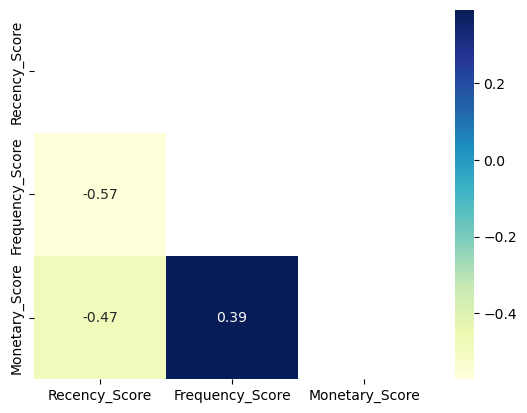

In [420]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np

correlation_matrix = best_loyal_cust[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].corr()
mask = np.triu(np.ones_like(correlation_matrix))
 
# plotting a triangle correlation heatmap
dataplot = sb.heatmap(correlation_matrix , cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
mp.show()

Frequency and Monetary has highest corelated features while Frequency and Recency are not at all related for the best loyal customers.

Now we will see the number of customers in ech of the Customer Segment Categories 

In [421]:
no_of_cust = rfm_data["Customer_Segments"].value_counts()
no_of_cust

Potential Loyalist      503
At Risk Customers       180
Cant Lose               173
Lost                     82
Best Loyal Customers     62
Name: Customer_Segments, dtype: int64

In [422]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

fig_cust = go.Figure(data=[go.Bar(x=no_of_cust.index, y=no_of_cust.values,
                            marker=dict(color=pastel_colors))])

# Update the layout
fig_cust.update_layout(title='Comparison of Customer Segments',
                  xaxis_title='Customer Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig_cust.show()

In [423]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = rfm_data.groupby('Customer_Segments')['Recency_Score', 'Frequency_Score', 'Monetary_Score'].mean().reset_index()
segment_scores

C:\Users\HP\AppData\Local\Temp\ipykernel_11296\1588123159.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Customer_Segments,Recency_Score,Frequency_Score,Monetary_Score
0,At Risk Customers,2.344444,1.011111,1.644444
1,Best Loyal Customers,3.806452,3.064516,3.225806
2,Cant Lose,1.537572,1.000000,1.462428
3,Lost,1.000000,1.000000,1.000000
4,Potential Loyalist,3.918489,1.194831,1.741551


In [424]:
# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['Customer_Segments'],
    y=segment_scores['Recency_Score'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['Customer_Segments'],
    y=segment_scores['Frequency_Score'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['Customer_Segments'],
    y=segment_scores['Monetary_Score'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()

In [425]:
location_best_cust = best_loyal_cust .groupby("Location").size().reset_index(name = 'Count')
location_best_cust

,Location,Count
0,London,16
1,New York,15
2,Paris,9
3,Tokyo,22


In [426]:
fig_pie= px.pie(location_best_cust, values='Count', names='Location', title='Location of the Best Loyal Customers')
fig_pie.show()

In [427]:
fig_4 = go.Figure()
fig_4.add_trace(go.Box(y=best_loyal_cust ['Monetary_Value'], name='Monetary for Best Loyal Customers'))
fig_4.show()

We can see that the most of the "Best Loyal Customers" are in Tokyo. This information can help us to create a marketing stratergy for the people in Tokyo to attract more customers. Also we make a business plan to attract more customer in Paris.

Analyzing the traits of the "Best Loyal Customers"

1) Most of the Customers live in Tokyo and London

2) Recency values of these Customers lies between 3 - 5 and the Monetary Values lies in between 3-4 

3) Frequency and Monetary are cosely related for them. The more frequent they buy the product the more monetary value they have.

4) These Customers spends from almost $ 900 $ to $ 1700 $ usually.

We can do this analyzing of traits for other Categories also.

Analyzing these traits will help the company to create and update their marketing stratergies according to their Customer traits. 

This way they can have more Customer Satisfaction oriented bussiness plan.